# <font color=900C3F>LIMPEZA DE DATOS (VALORES NULOS Y OUTLIERS)</font>

---

## <font color=#FF5733>REQUISITOS:</font>

> Los datos importados en este cuaderno han sido organizados en una fase anterior a esta, donde los datos, han pasado por un procesamiento de carga, tratamiento de estructura de columnas, traducción al español y fusion de los datos en un unico CSV.
> 
> El proceso de limpieza de los datos tiene como objetivo verificar si hay valores nulos y outiliers en el conjunto de datos importados a este cuaderno.
> 
> Outiliers son valores atípicos que pueden presentarse en un conjunto de datos y deben ser tratados.
> 
> El proceso de limpieza de Outiliers debe aplicar la técnica de los "Cuartiles" para eliminar los valores atípicos.
> 
> El proceso de tratamiento de Outliers empieza después del tratamiento de valores nulos.
>  
> Después de hacer la limpieza de los datos, este proceso debe generar un fichero en formato CSV, para ser usado en la proxima fase del proyecto.

---

## <font color=#FF5733>Importar Librerías</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
%matplotlib inline

## <font color=#FF5733>Importar CSVs</font>

### <font color=#186a3b>--> Definir las rutas de los ficheros leídos y generados en el proceso de carga de datos </font>

In [2]:
# Definir la ruta donde se encuentra la carpeta y los CSVs que iremos trabajar
ruta_nuevoCSV = '../data/ficheros_procesados/datos_preprocesados_limpios.csv'
ruta_datos_preprocesados = '../data/ficheros_procesados/datos_preprocesados.csv'

# Creación del DataFrame
df = pd.read_csv(ruta_datos_preprocesados, delimiter=",", engine="python")
df.head(2)

,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
1,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139


### Cantidad de datos importados

In [3]:
df.shape

(54, 10)

### Estadística Descriptiva - SITUACIÓN ACTUAL

#### Estructura de columnas (tipos de datos)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           54 non-null     int64  
 1   Country                        54 non-null     object 
 2   Region                         54 non-null     object 
 3   Happiness Score                54 non-null     float64
 4   Economy (GDP per Capita)       54 non-null     float64
 5   Social support                 54 non-null     float64
 6   Health (Life Expectancy)       54 non-null     float64
 7   Freedom                        54 non-null     float64
 8   Trust (Government Corruption)  54 non-null     float64
 9   Generosity                     54 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.3+ KB


#### Resumen 1: Estadística Descriptiva

In [5]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Year,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,54.00,54.00,54.00,54.00,54.00,54.00,54.00,54.00
mean,2019.00,7.33,1.51,1.39,0.84,0.62,0.33,0.26
std,2.61,0.44,0.23,0.19,0.14,0.10,0.16,0.09
min,2015.00,6.31,1.23,1.06,0.54,0.36,0.06,0.10
25%,2017.00,7.35,1.34,1.22,0.79,0.58,0.15,0.19
50%,2019.00,7.50,1.44,1.48,0.85,0.65,0.39,0.25
75%,2021.00,7.56,1.57,1.55,0.95,0.69,0.45,0.35
max,2023.00,7.84,2.00,1.64,1.06,0.77,0.54,0.48


#### Resumen 2: Estadística Descriptiva

In [6]:
# df.describe().round(2).T
df.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))


,count,mean,std,min,25%,50%,75%,max
Year,54.00,2019.00,2.61,2015.00,2017.00,2019.00,2021.00,2023.00
Happiness Score,54.00,7.33,0.44,6.31,7.35,7.50,7.56,7.84
Economy (GDP per Capita),54.00,1.51,0.23,1.23,1.34,1.44,1.57,2.00
Social support,54.00,1.39,0.19,1.06,1.22,1.48,1.55,1.64
Health (Life Expectancy),54.00,0.84,0.14,0.54,0.79,0.85,0.95,1.06
Freedom,54.00,0.62,0.10,0.36,0.58,0.65,0.69,0.77
Trust (Government Corruption),54.00,0.33,0.16,0.06,0.15,0.39,0.45,0.54
Generosity,54.00,0.26,0.09,0.10,0.19,0.25,0.35,0.48


## <font color=#FF5733>Tratar valores Nulos</font>

In [7]:
df.isnull().sum()

Year                             0
Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

Visualizar si hay valores nulos en la Gráfica

<Axes: >

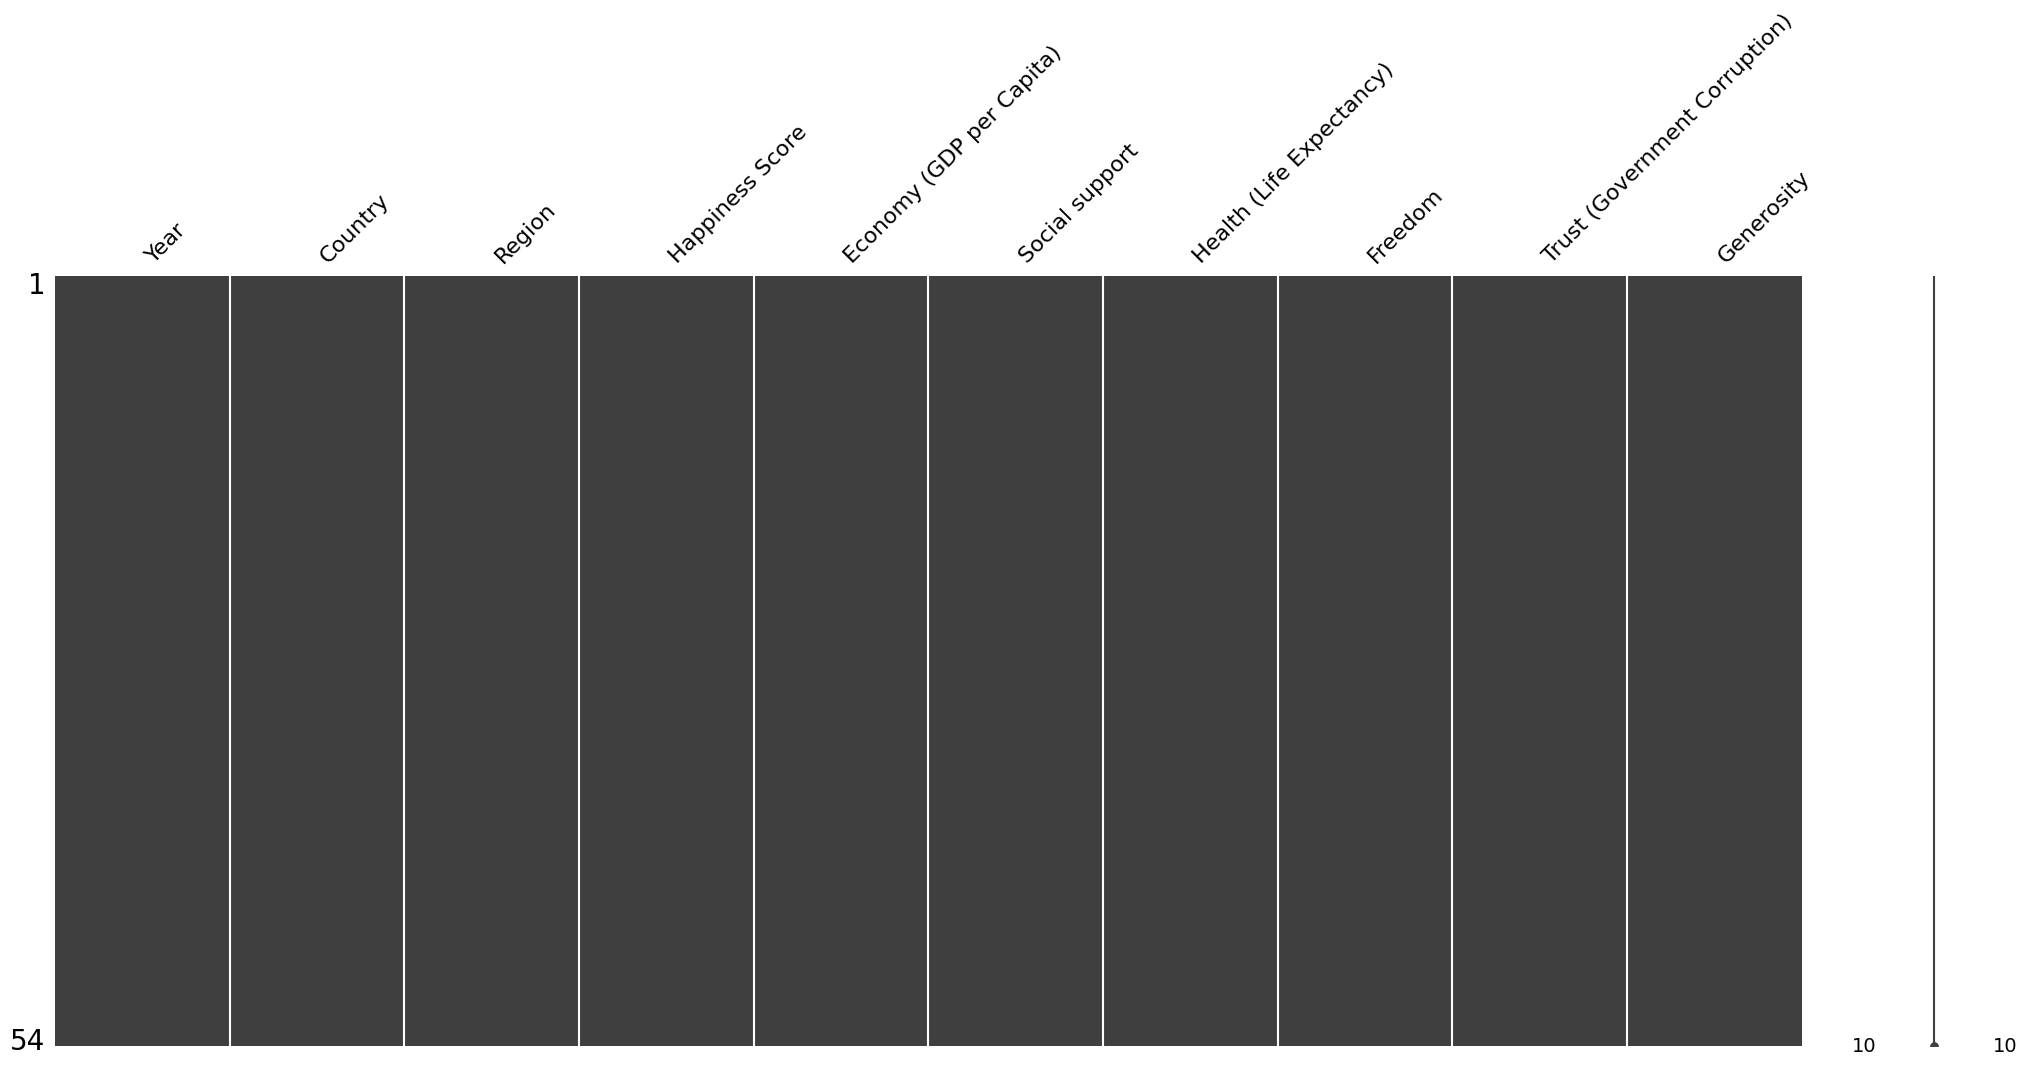

In [8]:
msno.matrix(df)

👨‍💻 `¡Importante!` 
><font color=#DAF>Hay valores nulos porque en la carga de los CSVs de 2017 y 2020 hemos detectado valores inválidos y hemos atribuído a estas columnas valores nulos para ser tratadas en este cuaderno.</font>

In [9]:
# # función que recibe una lista de columnas, calcula la mediana
# def nulos(dataframe, columns):
#    resultado = pd.DataFrame(columns=['Columna', 'Valor_mediana'])
    
#    for col in columns:
#        median_value = dataframe[col].median()
#        dataframe[col] = dataframe[col].fillna(median_value)

#        resultado = pd.concat([resultado, pd.DataFrame({
#            'Columna': [col],
#            'Valor_mediana': [median_value]
#        })], ignore_index=True)
#    df_cuartil = resultado       
#    return resultado

In [10]:

# def nulos(df, cols):
#     median_values = {}
#     for col in cols:
#         median_val = df[col].median()
#         median_val = round(median_val, 6)  # ensure accuracy up to six decimal places
#         df[col].fillna(median_val, inplace=True)
#         median_values[col] = median_val
#     return pd.DataFrame(list(median_values.items()), columns=['Column_Name', 'Median_Value'])

In [11]:
df.columns

Index(['Year', 'Country', 'Region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [12]:
# numeric_columns = ['Happiness Score', 'Economy (GDP per Capita)', 'Social support', \
#                     'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', \
#                     'Generosity']

# # Llama la función "nulos" 
# resultado = nulos(df, numeric_columns)
# print(resultado)

In [13]:
df

,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Iceland,Western Europe,7.5610,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300
1,2015,Denmark,Western Europe,7.5270,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390
2,2015,Norway,Western Europe,7.5220,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990
3,2015,Finland,Western Europe,7.4060,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510
4,2015,Sweden,Western Europe,7.3640,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620
5,2015,Spain,Western Europe,6.3290,1.230110,1.313790,0.955620,0.459510,0.063980,0.182270
6,2016,Denmark,Western Europe,7.5260,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710
7,2016,Iceland,Western Europe,7.5010,1.426660,1.183260,0.867330,0.566240,0.149750,0.476780
8,2016,Norway,Western Europe,7.4980,1.577440,1.126900,0.795790,0.596090,0.357760,0.378950
9,2016,Finland,Western Europe,7.4130,1.405980,1.134640,0.810910,0.571040,0.410040,0.254920


In [14]:
df.shape

(54, 10)

## <font color=#FF5733>Análisis Exploratória - Valores Atípico (Outliers)</font>

Empezamos por analisar si hay valores atípico en nuestro conjunto de datos y luego identificamos por medio de las gráficas de bigotes (BoxPlot), cuales son los valores que estan fuera del Rango Intercuartil".

In [15]:
# funcion que dado un determinado dataframe genera una tabla con los valores de parámetros de Cuartiles que vamos 
# aplicar en el tramamiento de Outiers.
def calcular_estadisticas(df):
    # Crear un nuevo DataFrame para almacenar los resultados de los cuartiles
    resultados_df = pd.DataFrame(
        columns=[
            "Columna",
            "Cuartil 0.25",
            "Cuartil 0.50",
            "Cuartil 0.75",
            "Rango intercuartil",
        ]
    )

    # Crea una lista con las variables que queremos verificar los cuartiles
    numeric_columns = [
        "Happiness Score",
        "Economy (GDP per Capita)",
        "Social support",
        "Health (Life Expectancy)",
        "Freedom",
        "Trust (Government Corruption)",
        "Generosity"
    ]
    
       # Calcular los cuartiles y los rangos intercuartiles para cada columna
    for columna in numeric_columns:
        Q1 = df[columna].quantile(0.25)
        Q2 = df[columna].quantile(0.50)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        new_row = pd.DataFrame(
            {
                "Columna": columna,
                "Cuartil 0.25": Q1,
                "Cuartil 0.50": Q2,
                "Cuartil 0.75": Q3,
                "Rango intercuartil": IQR,
                "Limite inferior": limite_inferior,
                "Limite superior": limite_superior,
            },
            index=[0],
        )

        resultados_df = pd.concat([resultados_df, new_row], ignore_index=True)

    # retorna un nuevo DataFrame (resultados_df) con los resultados
    return resultados_df.head(15).round(2)

In [16]:
%%time 
# LLama la función para conocernos los valores de los parámetros del procesos de los cuartiles que iremos aplicar a 
# nuestro conjunto de datos. Esta tabla tambien sirve para la documentación del proyecto.
calcular_estadisticas(df)

CPU times: total: 31.2 ms
Wall time: 39 ms


,Columna,Cuartil 0.25,Cuartil 0.50,Cuartil 0.75,Rango intercuartil,Limite inferior,Limite superior
0,Happiness Score,7.35,7.50,7.56,0.21,7.03,7.87
1,Economy (GDP per Capita),1.34,1.44,1.57,0.23,1.00,1.91
2,Social support,1.22,1.48,1.55,0.33,0.73,2.04
3,Health (Life Expectancy),0.79,0.85,0.95,0.17,0.54,1.20
4,Freedom,0.58,0.65,0.69,0.10,0.43,0.84
5,Trust (Government Corruption),0.15,0.39,0.45,0.29,-0.28,0.89
6,Generosity,0.19,0.25,0.35,0.16,-0.05,0.58


### <font color=#FF5733>Gráficas (Situación Actual)</font>
Hemos detectado algunos valores atípicos, pero no hemos querido dar tratamento con el metodo de los cuartiles porque se eliminarian países de la base de datos. En el conjunto de datos del proyecto, cada línea representa un país por esto lo hemos mantenido y no hemos eliminado estos valores atípicos de la base de datos.

#### Diagrama de Caja y Bigotes (BoxPlot)

In [17]:
# Genera la gráfica de Bigote con todas las variables juntas
def generar_grafica_boxplot(dataframe):
    plt.figure(figsize=(12, 8))
    plt.grid(True)
    plt.rcParams.update({"font.size": 10})  # Cambiar tamaño de la fuente
    
    # Generar el boxplot
    boxplot = dataframe.boxplot(
        column=[
            "Economy (GDP per Capita)",
            "Social support",
            "Health (Life Expectancy)",
            "Freedom",
            "Trust (Government Corruption)",
            "Generosity",
            "Happiness Score",       
        ],
        return_type="axes",
        showmeans=True
    )
    
    # Corregir la rotación del eje x
    ax = boxplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    
    return boxplot


CPU times: total: 93.8 ms
Wall time: 164 ms


matplotlib.axes._axes.Axes

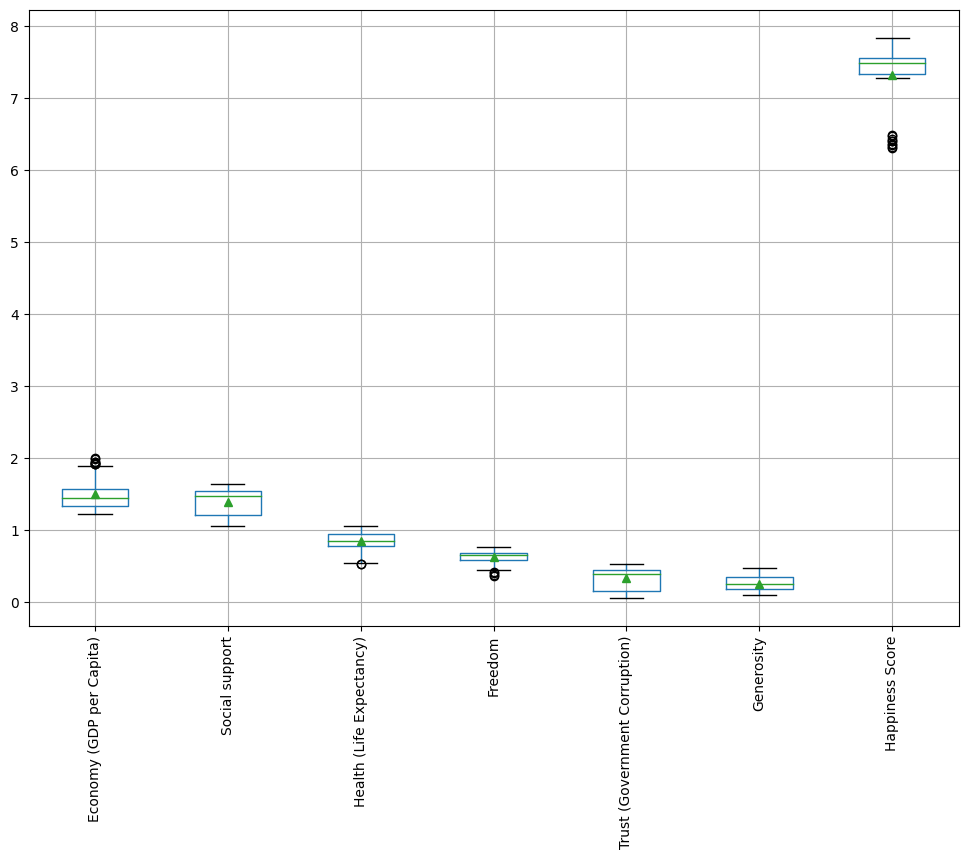

In [18]:
%%time 
# Llamada a la función
grafica = generar_grafica_boxplot(df)
type(grafica)

#### Diagrama de Caja y Bigotes (BoxPlot) generado individualmente para cada columna (variable)

In [19]:
# Define una función llamada "plot_boxplot"

# Crea el diagram de caja y bigote
def plot_boxplot(dataframe, columna):
    # Crea la gráfica boxplot
    dataframe.boxplot(column=[columna])

    # Elimina las líneas de cuadrícula
    plt.grid(False)

    # Apresenta la gráfica en pantalla
    plt.show()

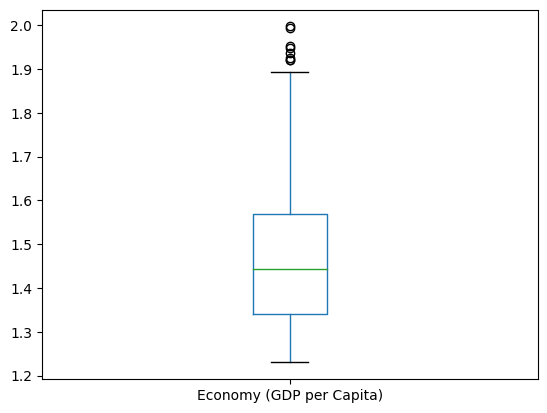

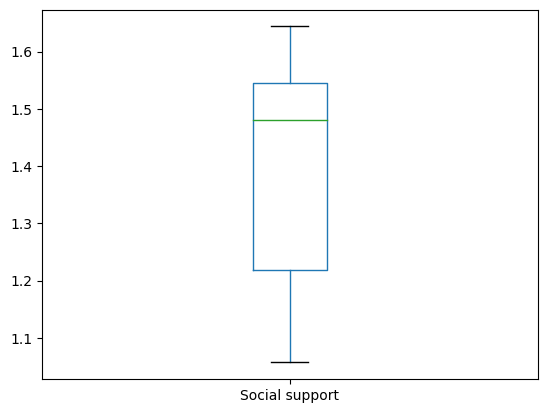

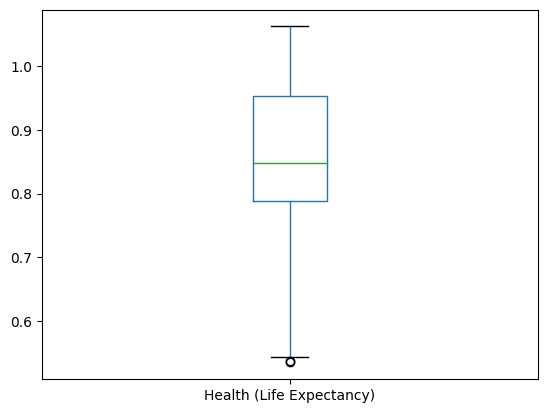

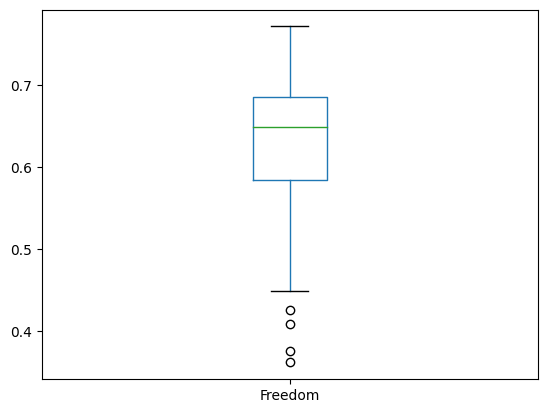

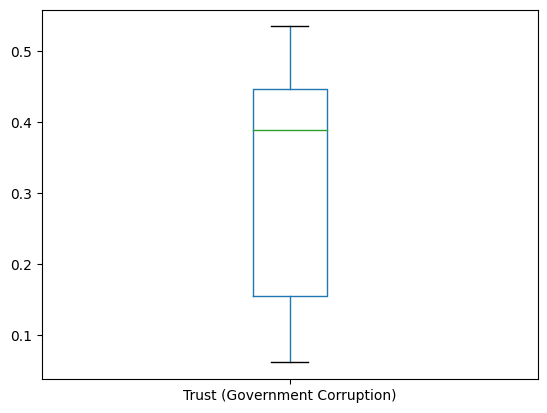

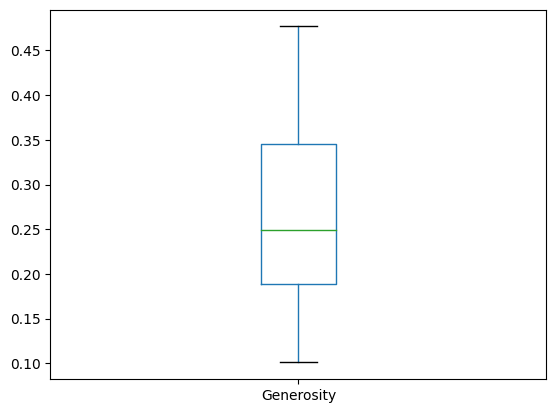

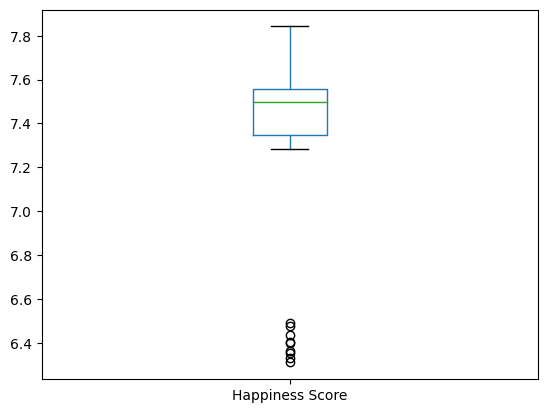

In [20]:
plot_boxplot(df, "Economy (GDP per Capita)")
plot_boxplot(df, "Social support")
plot_boxplot(df, "Health (Life Expectancy)")
plot_boxplot(df, "Freedom")
plot_boxplot(df, "Trust (Government Corruption)")
plot_boxplot(df, "Generosity")
plot_boxplot(df, "Happiness Score")


## <font color=#FF5733>Generar nuevo CSV con los datos limpios</font>

In [21]:
df.shape
df.describe().sum()

Year                             12170.606233
Happiness Score                     98.322244
Economy (GDP per Capita)            63.324014
Social support                      62.522378
Health (Life Expectancy)            59.165355
Freedom                             57.778058
Trust (Government Corruption)       56.074471
Generosity                          55.714126
dtype: float64

In [22]:
df.to_csv(ruta_nuevoCSV, index=False)